# Kepler's Laws

Preliminaries:

In [1]:
%matplotlib notebook

import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.animation
from IPython import display

## Kepler's laws of planetary motion

In astronomy, Kepler's laws of planetary motion are three scientific laws describing the motion of planets around the Sun:

1. The orbit of a planet is an ellipse with the Sun at one of the two foci.
2. A line segment joining a planet and the Sun sweeps out equal areas during equal intervals of time.
3. The square of the orbital period of a planet is proportional to the cube of the semi-major axis of its orbit.

source: [Wikipedia](https://en.wikipedia.org/wiki/Kepler%27s_laws_of_planetary_motion)

***


## 1st Law: The orbit of a planet is an ellipse with the Sun at one of the two foci.

### 1. Cartesian equation
$$\frac {x^{2}}{a^{2}}+{\frac {y^{2}}{b^{2}}}=1 $$ 
$$ y=\pm {\frac {b}{a}}{\sqrt {a^{2}-x^{2}}}$$
$$ \text{focus:} \quad x_f=\pm \sqrt{a^2-b^2} $$

<IPython.core.display.Javascript object>


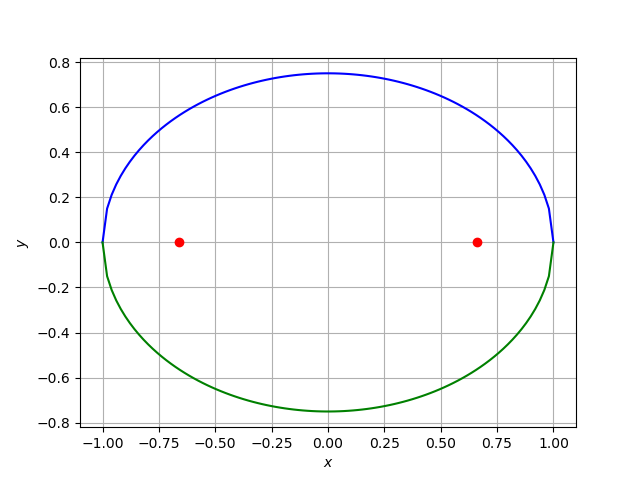

In [2]:
a=1.      # semi-major axis 
b=0.75    # semi-minor axis

c=np.sqrt(a**2-b**2)   # Focus of the ellipsis

x = np.linspace(-1, 1, 100)   

plt.figure()
plt.xlabel(f'$x$')
plt.ylabel(f'$y$')
plt.plot( x, b/a*np.sqrt(a**2-x**2),'b')
plt.plot( x, -b/a*np.sqrt(a**2-x**2),'g')
plt.plot([c,-c],[0,0],marker='o',color='r',linestyle=' ')

plt.axis('equal')
plt.grid()
plt.show()

### 2. Parametric equation
Using the parameter $t$, the  parametric representation of an ellipse with half axes $a$ and $b$ is as follows:
$$ x = a \cos{t} $$
$$ y = b \sin{t} $$
$$ 0 \ge t \le 2\pi $$

The focal points (foci) are given by:
$$ \text{focus:} \quad x_f=\pm \sqrt{a^2-b^2} =\pm f$$
$$ \text{eccentricity:} \quad e=\frac{\sqrt{a^2-b^2}}{a} =f/a$$

For each point on the ellipse the sum of the distances to the two foci is constant:
$$d_1 + d_2 = 2a \ . $$

The area of the ellipse is
$$A=\pi a b \ .$$



<IPython.core.display.Javascript object>


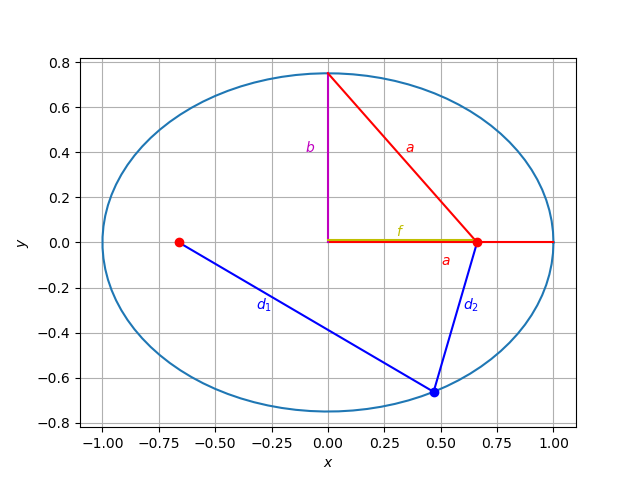

In [3]:
a=1.     # radius on the x-axis
b=0.75   # radius on the y-axis

c=np.sqrt(a**2-b**2)

t = np.linspace(0, 2*np.pi, 100)

plt.figure()
plt.xlabel(f'$x$')
plt.ylabel(f'$y$')
plt.plot( a*np.cos(t) , b*np.sin(t) )
plt.plot([0,a],[0,0],color='r')
plt.text(0.5, -0.1, f'$a$',color='r')
plt.plot([0,0],[0,b],color='m')
plt.text(-0.1, 0.4, f'$b$',color='m')
plt.plot([0,c],[b,0],color='r')
plt.text(0.34, 0.4, f'$a$',color='r')
plt.plot([0,c],[0.01,0.01],color='y')
plt.text(0.3, 0.03, f'$f$',color='y')

tt=5.2
plt.plot( a*np.cos(tt) , b*np.sin(tt),marker='o',color='b' )
plt.plot( [-c,a*np.cos(tt)],[0,b*np.sin(tt)],color='b' )
plt.plot( [c,a*np.cos(tt)],[0,b*np.sin(tt)],color='b' )
plt.text(-0.32, -0.3, f'$d_1$',color='b')
plt.text(0.6, -0.3, f'$d_2$',color='b')

plt.plot([c,-c],[0,0],marker='o',color='r',linestyle=' ')

plt.axis('equal')
plt.grid()
plt.show()

### 3. Cone section
The shape of the ellispe is defined in polar coordinates:

$$ r = \frac{e d}{1 + e \cos (\theta+\delta)} $$

Note that one focal point is in the origin of the coordinate system. The eccentricity is defined as

$$e=\frac{\sqrt{a^2-b^2}}{a}$$

and the factor $ed$ is given as

$$ed = \frac{b^2}{a} \ . $$

<IPython.core.display.Javascript object>


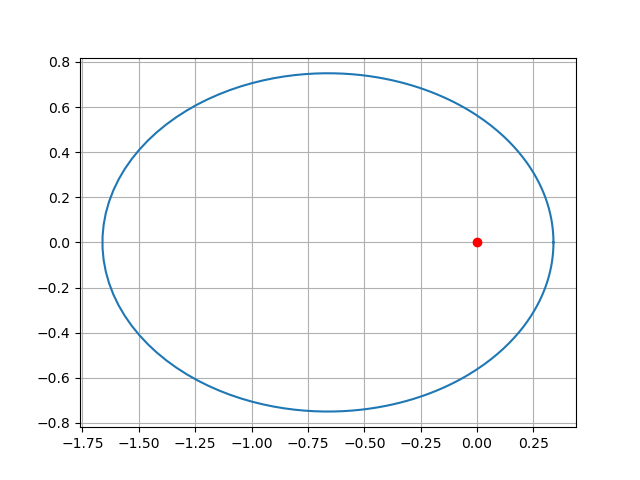

In [4]:
a=1.     # radius on the x-axis
b=0.75   # radius on the y-axis

e = np.sqrt(a**2-b**2)/a
ed = b**2/a

t = np.linspace(0, 2*np.pi, 200)

r = ed/(1+e*np.cos(t))

plt.figure()
plt.plot( r*np.cos(t) , r*np.sin(t) )
plt.plot([0],[0],marker='o',color='r',linestyle=' ')

plt.axis('equal')
plt.grid()
plt.show()

### 4. Interactive plot 1

Adjust the ellipse by moving the sliders for the half axes $a$ and $b$:

In [5]:
def update_ell1(a, b):
    c = np.sqrt(a**2-b**2)
    t = np.linspace(0, 2*np.pi, 100)
    e=np.sqrt(a**2-b**2)/a

    ell.set_data( a*np.cos(t) , b*np.sin(t)) 
    f1.set_data([c,-c],[0,0])
    ee.set_text(f'$e$={e:.2f} ')
    plt.show()

<IPython.core.display.Javascript object>


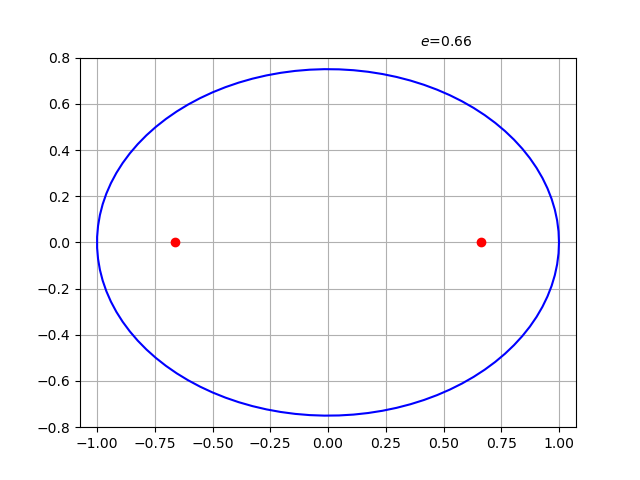

interactive(children=(FloatSlider(value=1.0, description='a', max=1.0, step=0.01), FloatSlider(value=0.75, des…

In [6]:
fig,ax = plt.subplots(1)

ax.axis('equal')
ax.grid(True)
ax.set_xlim([-1.1, 1.1])
ax.set_ylim([-0.8, 0.8])

ell, = ax.plot(1,1,color='b')
f1,  = ax.plot(1,1,color='r',marker='o',linestyle=' ')
ee = ax.text(0.4, 0.85, f'')

widgets.interact(update_ell1, \
         a=widgets.FloatSlider(min=0,max=1,step=0.01,value=1, description='a'), \
         b=widgets.FloatSlider(min=0,max=1,step=0.01,value=0.75, description='b') );

### 5. Interactive plot 2

Adjust the ellipse by moving the sliders for the eccentricity $e$, scale $d$ and phase shift $\delta$:

In [7]:
def update_ell2(e, d,delta):
    t = np.linspace(0, 2*np.pi, 100)
    r = e*d/(1+e*np.cos(t+delta))
    ell.set_data( r*np.cos(t) , r*np.sin(t)) 
    f1.set_data([0],[0])
    plt.show()

<IPython.core.display.Javascript object>


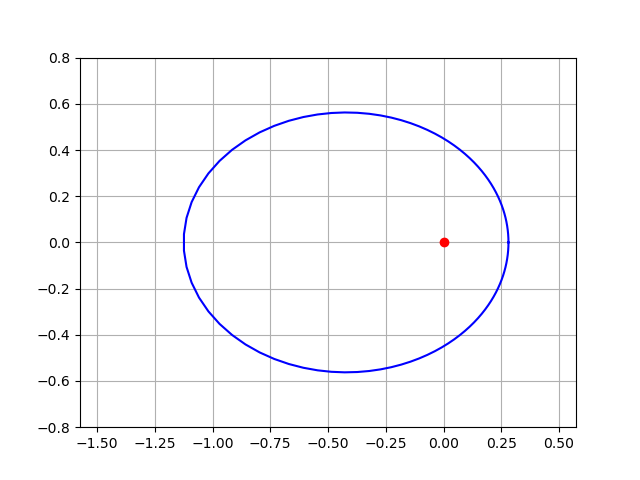

interactive(children=(FloatSlider(value=0.6, description='e', max=3.0, step=0.01), FloatSlider(value=0.75, des…

In [8]:
fig,ax = plt.subplots(1)

ax.axis('equal')
ax.grid(True)
ax.set_xlim([-2.1, 1.1])
ax.set_ylim([-0.8, 0.8])

ell, = ax.plot(1,1,color='b')
f1,  = ax.plot(1,1,color='r',marker='o',linestyle=' ')


widgets.interact(update_ell2, \
         e=widgets.FloatSlider(min=0,max=3,step=0.01,value=0.6, description='e'), \
         d=widgets.FloatSlider(min=0,max=2,step=0.01,value=0.75, description='d'), \
         delta=widgets.FloatSlider(min=0,max=2*np.pi,step=0.01,value=0., description='$\delta$'));

## 2nd law: a line segment joining a planet and the Sun sweeps out equal areas during equal intervals of time.

Demonstration of the constancy of the sector velocity

<IPython.core.display.Javascript object>


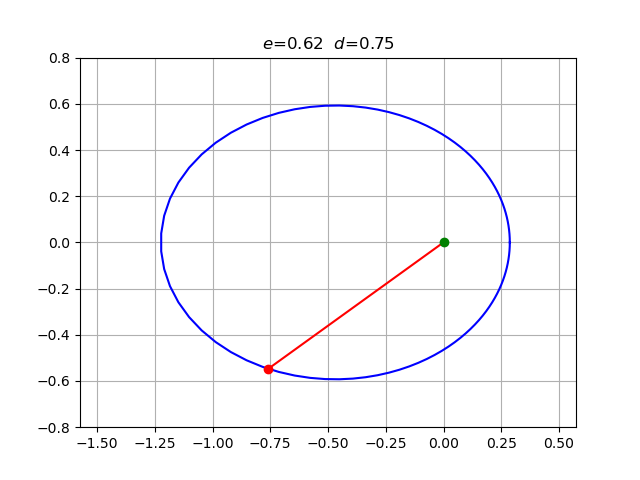

In [9]:
# nearly circular orbit
#e=0.01; d=40

# moderately eccentric orbit
e=0.62; d=0.75

# strongly eccentric orbit
#e=0.91; d=0.13

t = np.linspace(0, 2*np.pi, 100)
r = lambda e,d,p: e*d/(1+e*np.cos(p))

nf = 500
dphi = 0.01
phi = 0

rr=np.zeros(nf); pp=np.zeros(nf)
for i in range(nf):
    rr[i]=r(e,d,phi)
    pp[i]=phi
    phi = phi + 1/(rr[i]**2) * dphi
    
fig,ax = plt.subplots(1)
ell, = ax.plot([],[],color='b')
l1,  = ax.plot([],[],color='r')
f0,  = ax.plot([],[],color='g',marker='o')
f1,  = ax.plot([],[],color='r',marker='o')
plt.title(f"$e$={e:.2f}  $d$={d:.2f}")

def init():
    ax.axis('equal')
    ax.grid(True)
    ax.set_xlim([-2.1, 1.1])
    ax.set_ylim([-0.8, 0.8])
    ell.set_data( r(e,d,t)*np.cos(t), r(e,d,t)*np.sin(t)) 
    f0.set_data([0],[0])

def animate(j):
    x=np.cos(pp[j])*rr[j]
    y=np.sin(pp[j])*rr[j]
    f1.set_data(x,y)
    l1.set_data([0,x],[0,y])
    return f1,l1
    
ani=matplotlib.animation.FuncAnimation(fig, animate, frames=nf, init_func=init, repeat=False,blit=True,interval=10)

In [10]:
# convert to html5 video
# plt.rcParams['animation.ffmpeg_path'] = '/path_to_your/ffmpeg'
video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()       